In [1]:
import pandas as pd

In [2]:
df_2014 = pd.read_csv('data/survey_2014.csv')
df_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# fem una descripció inicial de les dades
print(df_2014.shape)
print(df_2014.info())

(1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 1

In [4]:
df_2014 = df_2014.drop(['comments'], axis= 1)
df_2014 = df_2014.drop(['Timestamp'], axis= 1)

In [5]:
# observem els valors nuls
df_2014.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [6]:
df_2014["state"] = df_2014["state"].fillna("NA")
df_2014["work_interfere"] = df_2014["work_interfere"].fillna("NA")
df_2014.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NA,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NA,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
# treiem el min i max per edat, per veure si hi ha outliers
print(df_2014["Age"].min())
print(df_2014["Age"].max())

-1726
99999999999


In [8]:
# assumirem que per estar treballant es té un mínim de 16 anys. Com a màxim posarem 100 anys. Els valors que
# són outliers els posarem com a la mitjana. Per evitar que els outliers influeixin massa a la mitjana
# els convertim a null
import numpy as np

for (row, col) in df_2014.iterrows():
    edat = col.Age
    if edat < 16 or edat > 100:
        df_2014["Age"].replace(to_replace=col.Age, value=np.nan, inplace=True)

mitjana = df_2014["Age"].median()
for (row, col) in df_2014.iterrows():
    edat = col.Age
    if edat < 16 or edat > 100:
        df_2014["Age"].replace(to_replace=col.Age, value=mitjana, inplace=True)
print(df_2014["Age"].min())
print(df_2014["Age"].max())        

18.0
72.0


In [9]:
# el rang està entre 18 i 72. Per tant, dividim entre 4 i fem els rangs
minim = df_2014["Age"].min()
maxim = df_2014["Age"].max()
diff = maxim - minim
interval = diff/4

edats = []
for (row, col) in df_2014.iterrows():
    edat = col.Age    
    if edat >= minim and edat < (minim+interval):
        edats.append("%d-%d" % (minim, minim+interval))
    elif edat >= minim+interval and edat < (minim+(interval*2)):
        edats.append("%d-%d" % (minim+interval, minim+(interval*2)))
    elif edat >= minim+(interval*2) and edat < (minim+(interval*3)):
        edats.append("%d-%d" % (minim+(interval*2), minim+(interval*3)))
    else:        
        edats.append("%d-%d" % (minim+(interval*3), maxim))
        
df_2014["rang_edat"] = edats

valors_edat = df_2014["Age"]
df_2014 = df_2014.drop(['Age'], axis=1)
df_2014.head()


,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,rang_edat
0,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-45
1,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,31-45
2,Male,Canada,NA,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,31-45
3,Male,United Kingdom,NA,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,18-31
4,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,18-31


In [10]:
# tractem el valor gender, treiem tots els possibles valors
genders = df_2014['Gender'].str.lower().str.strip().unique()
print(genders)

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'androgyne' 'agender' 'cis-female/femme' 'guy (-ish) ^_^'
 'male leaning androgynous' 'man' 'trans woman' 'msle' 'neuter'
 'female (trans)' 'queer' 'female (cis)' 'mail' 'a little about you'
 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [11]:
# veiem els possibles valors que ens indiquen si és home o dona. També afegirem gèneres no binaris
# els valors sense sentit els posarem com NA
valors_home = ["m", "male", "male-ish", "maile", "cis male", "mal", "male (cis)",
               "make", "guy (-ish) ^_^", "man", "msle", "mail", "malr", "cis man"]
valors_dona = ["cis female", "f", "woman", "femake", "female", "cis-female/femme", "female (cis)", "femail"]
valors_altres = ["trans-female", "queer/she/they", "non-binary", "all", "enby", "fluid",
                 "genderqueer", "androgyne", "agender", "male leaning androgynous",
                 "trans woman", "neuter", "female (trans)", "queer"]
valors_na = ["something kinda male?", "nah", "a little about you", "p",
             'ostensibly male, unsure what that really means']

# iterem per totes les files
for (row, col) in df_2014.iterrows():
    columna = str.lower(col.Gender)
    columna  = columna.strip()
    if columna in valors_home:
        df_2014["Gender"].replace(to_replace=col.Gender, value='male', inplace=True)

    if columna in valors_dona:
        df_2014['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if columna in valors_altres:
        df_2014['Gender'].replace(to_replace=col.Gender, value='other', inplace=True)
        
    if columna in valors_na:
        df_2014['Gender'].replace(to_replace=col.Gender, value='NA', inplace=True)
        
print(df_2014['Gender'].unique())

['female' 'male' 'other' 'NA']


In [12]:
countries = df_2014['Country'].str.lower().str.strip().unique()
print(countries)

['united states' 'canada' 'united kingdom' 'bulgaria' 'france' 'portugal'
 'netherlands' 'switzerland' 'poland' 'australia' 'germany' 'russia'
 'mexico' 'brazil' 'slovenia' 'costa rica' 'austria' 'ireland' 'india'
 'south africa' 'italy' 'sweden' 'colombia' 'latvia' 'romania' 'belgium'
 'new zealand' 'zimbabwe' 'spain' 'finland' 'uruguay' 'israel'
 'bosnia and herzegovina' 'hungary' 'singapore' 'japan' 'nigeria'
 'croatia' 'norway' 'thailand' 'denmark' 'bahamas, the' 'greece' 'moldova'
 'georgia' 'china' 'czech republic' 'philippines']


In [13]:
employed = df_2014['self_employed'].str.lower().str.strip().unique()
print(employed)

[nan 'yes' 'no']


In [14]:
# assumim que els que tenen valor nan no estan empleats per compte propi, si no ho dirien
for (row, col) in df_2014.iterrows():
    if pd.isnull(col.self_employed):
        df_2014["self_employed"].replace(to_replace=col.self_employed, value="No", inplace=True)
employed = df_2014['self_employed'].str.lower().str.strip().unique()
print(employed)

['no' 'yes']


In [15]:
columns = ["family_history", "treatment", "work_interfere", "no_employees", "remote_work", "tech_company",
          "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave",
          "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor",
          "mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence"]

for column in columns:
    print("Columna %s - valors:" % column)
    print(df_2014[column].str.lower().str.strip().unique())


Columna family_history - valors:
['no' 'yes']
Columna treatment - valors:
['yes' 'no']
Columna work_interfere - valors:
['often' 'rarely' 'never' 'sometimes' 'na']
Columna no_employees - valors:
['6-25' 'more than 1000' '26-100' '100-500' '1-5' '500-1000']
Columna remote_work - valors:
['no' 'yes']
Columna tech_company - valors:
['yes' 'no']
Columna benefits - valors:
['yes' "don't know" 'no']
Columna care_options - valors:
['not sure' 'no' 'yes']
Columna wellness_program - valors:
['no' "don't know" 'yes']
Columna seek_help - valors:
['yes' "don't know" 'no']
Columna anonymity - valors:
['yes' "don't know" 'no']
Columna leave - valors:
['somewhat easy' "don't know" 'somewhat difficult' 'very difficult'
 'very easy']
Columna mental_health_consequence - valors:
['no' 'maybe' 'yes']
Columna phys_health_consequence - valors:
['no' 'yes' 'maybe']
Columna coworkers - valors:
['some of them' 'no' 'yes']
Columna supervisor - valors:
['yes' 'no' 'some of them']
Columna mental_health_interview 

In [16]:
# a continuació apliquem un label encoder per factoritzar
df_2014_original = df_2014.copy() # copiem la versió original sense labels

from sklearn import preprocessing
labelDict = {}

for feature in df_2014:
    le = preprocessing.LabelEncoder()
    le.fit(df_2014[feature])
    
    df_2014[feature] = le.transform(df_2014[feature])


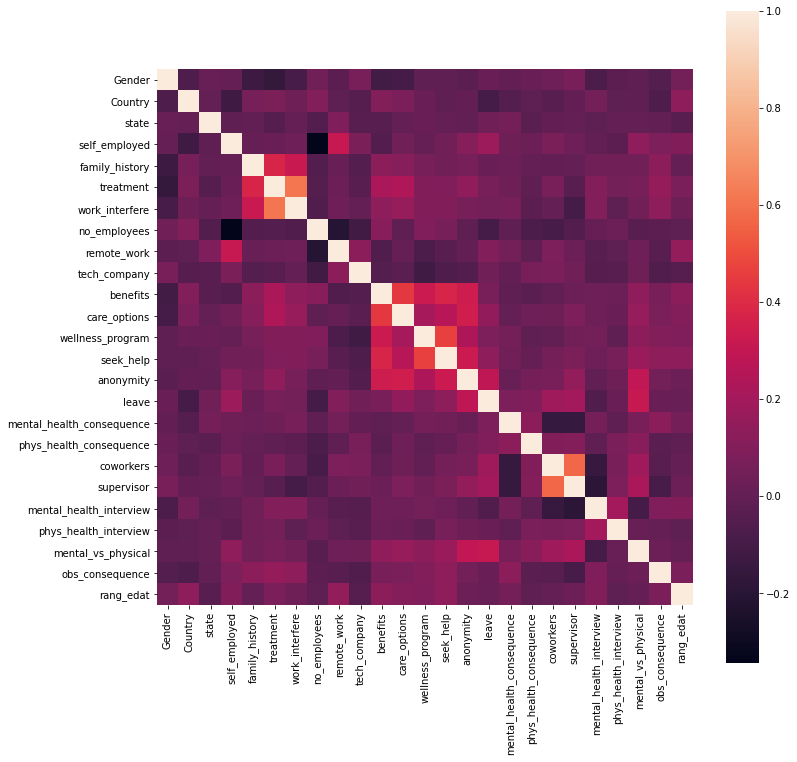

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

mat = df_2014.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(mat, square=True)
plt.show()


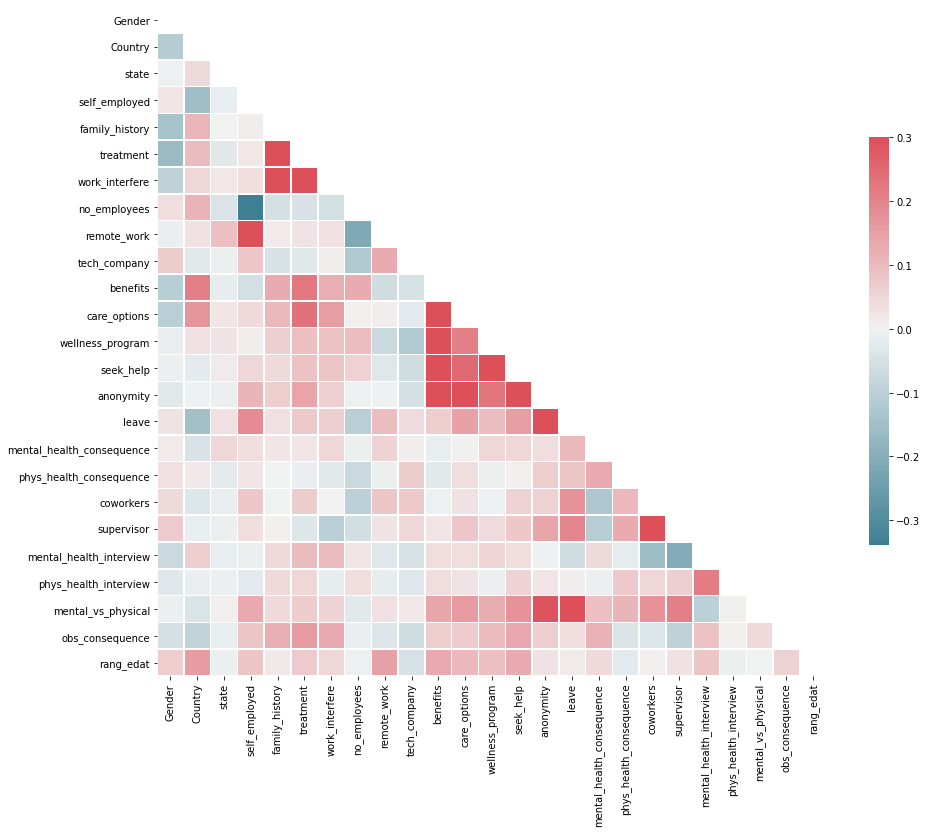

In [18]:
corr = df_2014.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

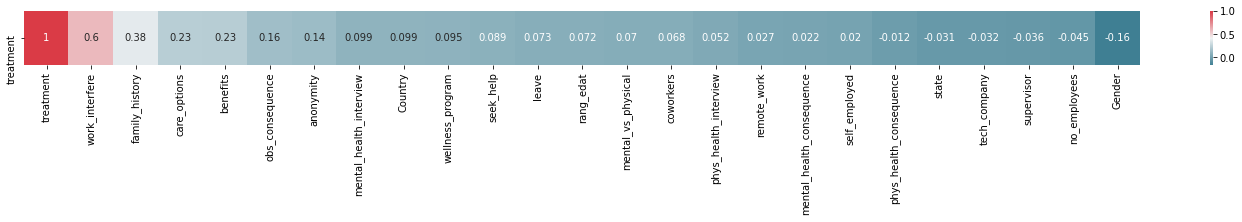

In [19]:
f, ax = plt.subplots(figsize=(25, 1))
treatment = corr.sort_values(by=['treatment'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['treatment'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(df_2014.drop(['treatment'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, df_2014.treatment)

chi_support = chi_selector.get_support()
chi_feature = df_2014.drop(['treatment'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print('Top-10 features: \n', chi_feature)

10 selected features
Top-10 features: 
 ['family_history', 'work_interfere', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_vs_physical', 'obs_consequence']


Text(0.5, 0, 'Edat')

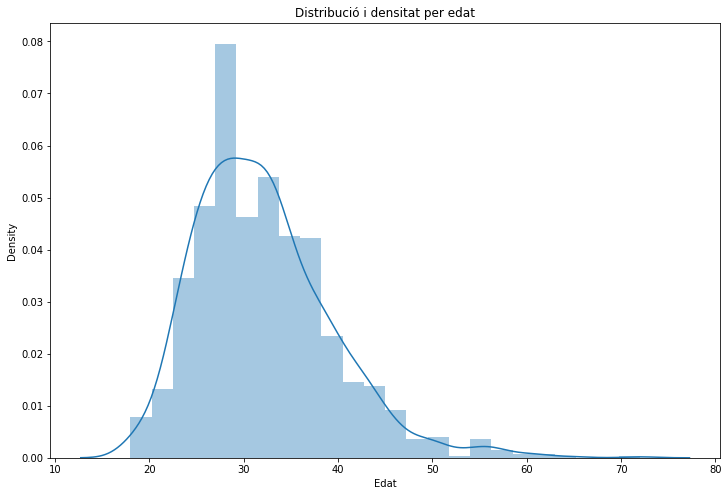

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 8))
sns.distplot(valors_edat, bins=24)
plt.title("Distribució i densitat per edat")
plt.xlabel("Edat")

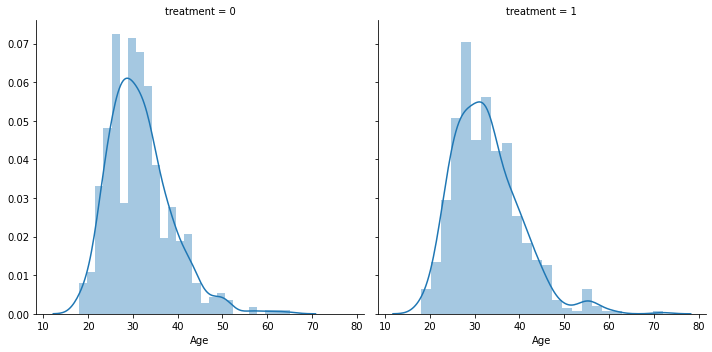

In [22]:
# afegim edat al dataset
df_2014["Age"] = valors_edat

g = sns.FacetGrid(df_2014, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

In [23]:
import pingouin as pg

# Levene's Test in Python using Pingouin
columns = ["Gender", "Country", "self_employed", "family_history", "work_interfere", "no_employees",
          "remote_work", "tech_company", "benefits", "seek_help", "anonymity", "leave"]
for column in columns:
    print("Test for %s" % column)
    print(pg.homoscedasticity(df_2014, group=column, dv="treatment", method="levene"))

Test for Gender
               W      pval  equal_var
levene  6.984452  0.000116      False
Test for Country
               W      pval  equal_var
levene  1.039669  0.400986       True
Test for self_employed
               W      pval  equal_var
levene  0.528137  0.467526       True
Test for family_history
                W      pval  equal_var
levene  13.005723  0.000323      False
Test for work_interfere
                W          pval  equal_var
levene  20.715948  1.501358e-16      False
Test for no_employees
               W     pval  equal_var
levene  0.355612  0.87881       True
Test for remote_work
               W      pval  equal_var
levene  0.595287  0.440527       True
Test for tech_company
               W      pval  equal_var
levene  1.079015  0.299118       True
Test for benefits
               W    pval  equal_var
levene  7.872455  0.0004      False
Test for seek_help
               W      pval  equal_var
levene  6.679828  0.001301      False
Test for anonymity
         

In [24]:
from sklearn.model_selection import train_test_split

feature_cols = ['rang_edat', 'Gender', 'Country', 'family_history', 'self_employed', 'benefits', 'remote_work',
                'tech_company']
X = df_2014[feature_cols]
y = df_2014.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(len(X_train))
print(len(X_test))


881
378


Precisió: 0.671957671957672
Percentatge de cert: 0.5026455026455027
Percentatge de fals: 0.4973544973544973
Valors reals: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Valors predits: [1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0]
[[138  50]
 [ 74 116]]
Puntuació AUC: 0.6722844344904816


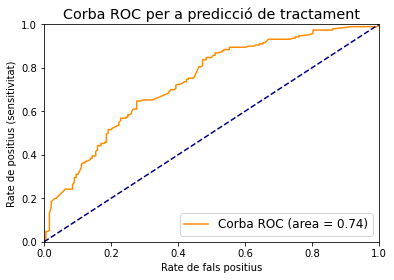

[[138  50]
 [ 74 116]]
Precisió del model de regressió logística: 0.67


In [25]:
# començarem per una regressió logística
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

def evaluaModel(model, y_test, y_pred_class, plot=False):
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Precisió:', accuracy)
    
    # percentatge de true/false
    print("Percentatge de cert:", y_test.mean())
    print("Percentatge de fals:",1 - y_test.mean())
    
    # Comparem els valors predits
    print('Valors reals:', y_test.values[0:25])
    print('Valors predits:', y_pred_class[0:25])
    
    # Matriu de confusió
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    print(confusion)
            
    # valor AUC
    print('Puntuació AUC:', metrics.roc_auc_score(y_test, y_pred_class))
        
    # corba roc
    y_pred_prob = model.predict_proba(X_test)[:, 1]    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='Corba ROC (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('Corba ROC per a predicció de tractament')
        plt.xlabel('Rate de fals positius')
        plt.ylabel("Rate de positius (sensitivitat)")
        plt.legend(loc="lower right")
        plt.show()
    
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)        
    
    return accuracy

def regressio_logistica(x_train, y_train, x_test, y_test, y_pred_class):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    
    y_pred_class = logreg.predict(x_test)
    
    accuracy = evaluaModel(logreg, y_test, y_pred_class, True)
    return accuracy
        
accuracy=regressio_logistica(X_train, y_train, X_test, y_test, "treatment")
print("Precisió del model de regressió logística: %.2f" % accuracy)

Precisió: 0.6746031746031746
Percentatge de cert: 0.5026455026455027
Percentatge de fals: 0.4973544973544973
Valors reals: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Valors predits: [1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1]
[[127  61]
 [ 62 128]]
Puntuació AUC: 0.6746080627099663


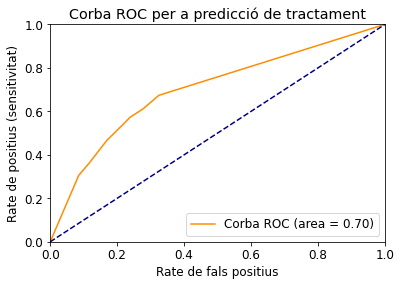

[[127  61]
 [ 62 128]]
Precisió del model d'arbre de decisió: 0.67


In [26]:
# arbre de decisió
from sklearn.tree import DecisionTreeClassifier

def arbre_decisio(X_train, y_train, X_test, y_test, y_pred_class):
    # Calculating the best parameters
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # fem prediccions i evaluem el model
    y_pred_class = tree.predict(X_test)
    accuracy_score = evaluaModel(tree, y_test, y_pred_class, True)
    return accuracy_score
    
accuracy = arbre_decisio(X_train, y_train, X_test, y_test, "treatment")

print("Precisió del model d'arbre de decisió: %.2f" % accuracy)

Text(0, 0.5, 'Total')

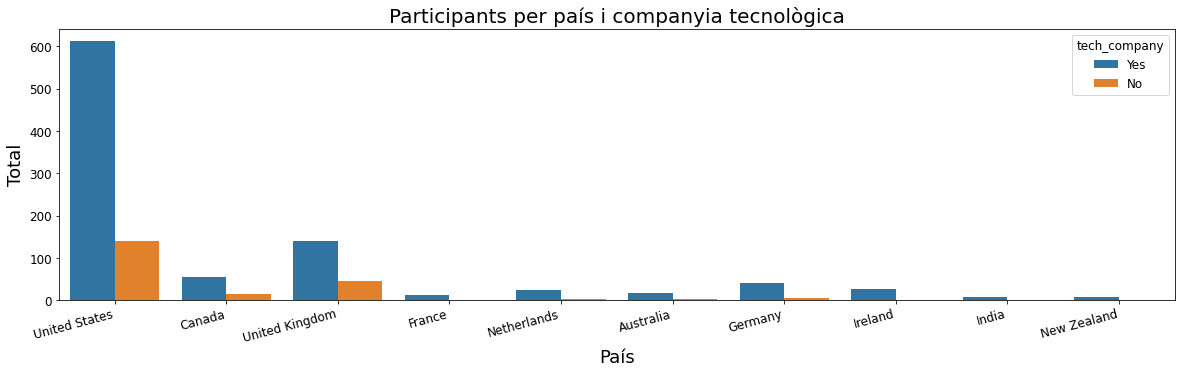

<Figure size 1152x288 with 0 Axes>

In [61]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

# No of respondents by Country
num_countries = df_2014_original.groupby('Country').size().sort_values(ascending=False)
top_countries = num_countries[:10]
data_top_countries = df_2014_original.loc[df_2014_original['Country'].isin(top_countries.keys())]
sns.countplot(x = data_top_countries['Country'], hue = data_top_countries['tech_company'], ax=ax1)
ax1.set_title('Participants per país i companyia tecnològica', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('País', fontsize = 18)
ax1.set_ylabel('Total', fontsize = 18)


Text(0, 0.5, 'Total')

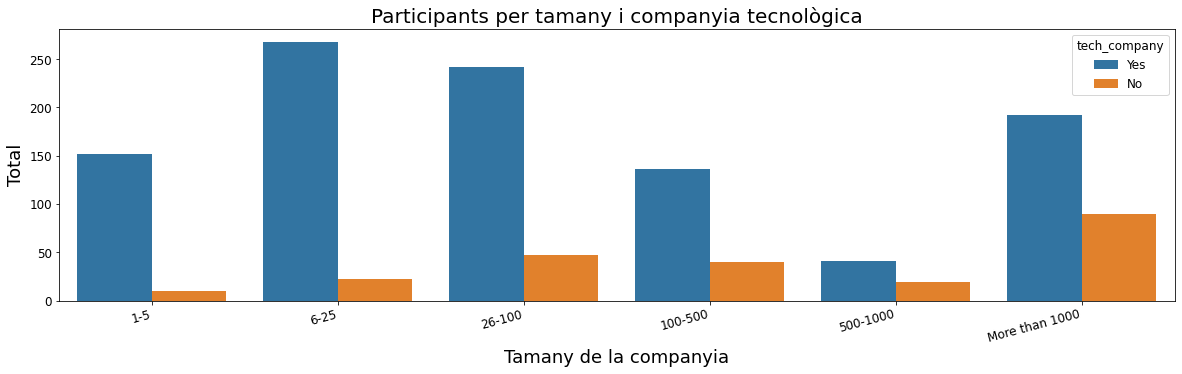

<Figure size 1152x288 with 0 Axes>

In [62]:
# participants per tamany de companyia
fig, ax1 = plt.subplots(nrows=1, ncols=1)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

sns.countplot(x = df_2014_original['no_employees'], hue = df_2014_original['tech_company'], ax=ax1,
             order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
ax1.set_title('Participants per tamany i companyia tecnològica', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Tamany de la companyia', fontsize = 18)
ax1.set_ylabel('Total', fontsize = 18)


Text(0.5, 1.0, 'Proporció per gènere %')

<Figure size 1152x360 with 0 Axes>

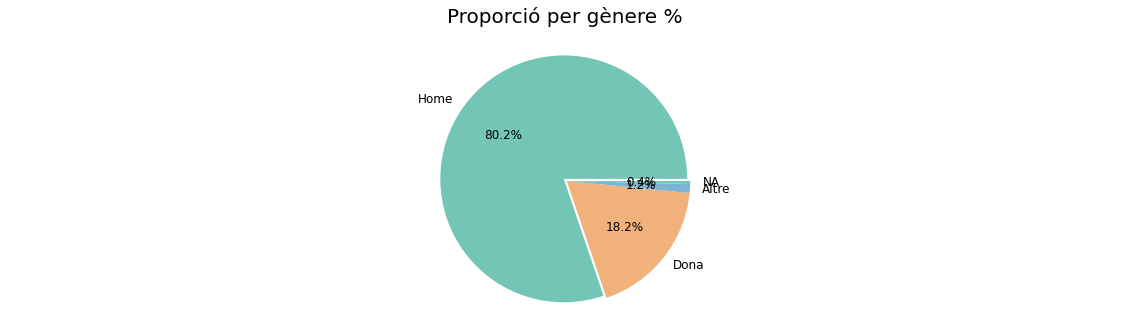

In [74]:
plt.figure(figsize = (16,5))
fig, ax1 = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

df_tecnologica = df_2014_original[df_2014_original["tech_company"] == "Yes"]

all_techs = df_tecnologica['Gender'].count()
males = df_tecnologica[df_tecnologica['Gender'] == 'male']['Gender'].count()
females = df_tecnologica[df_tecnologica['Gender'] == 'female']['Gender'].count()
other = df_tecnologica[df_tecnologica['Gender'] == 'other']['Gender'].count()
na = df_tecnologica[df_tecnologica['Gender'] == 'NA']['Gender'].count()

sizes = [males/all_techs, females/all_techs, other/all_techs, na/all_techs]
labels = "Home", "Dona", "Altre", "NA"
explode = (0.03, 0, 0, 0)  # explode 1st slice

ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
ax1.set_title('Proporció per gènere %', pad = 20, fontsize = 20)


<Figure size 1152x360 with 0 Axes>

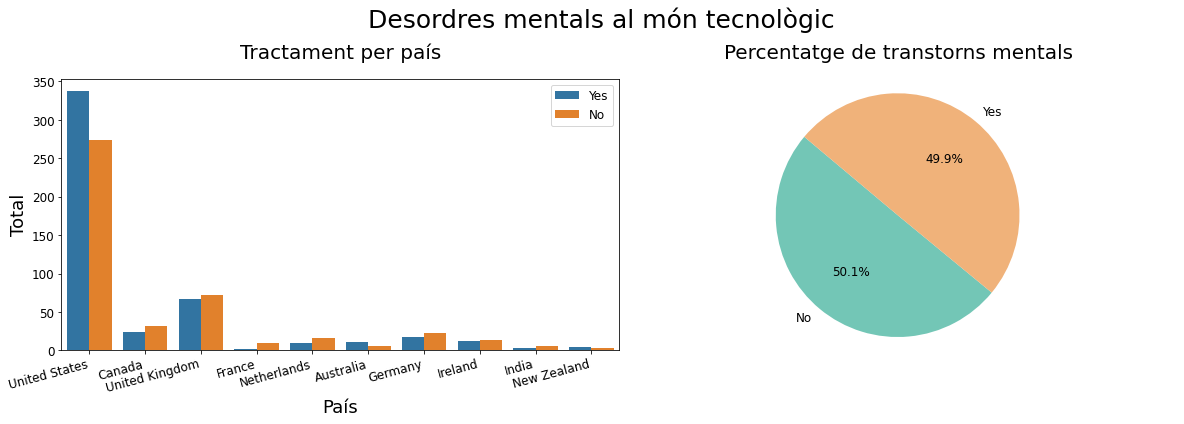

In [77]:
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Desordres mentals al món tecnològic', fontsize = 25, y=1.08)

# genere
all_techs = df_tecnologica['treatment'].count()
no = df_tecnologica[df_tecnologica['treatment'] == 'No']['treatment'].count()
yes = df_tecnologica[df_tecnologica['treatment'] == 'Yes']['treatment'].count()

labels = 'No', 'Yes'
sizes = [no/all_techs, yes/all_techs]
colors = ['#73C6B6', '#F0B27A']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Percentatge de transtorns mentals', pad = 20, fontsize = 20)

# per país
data_top_countries = df_tecnologica.loc[df_tecnologica['Country'].isin(top_countries.keys())]

sns.countplot(x = data_top_countries['Country'], hue = data_top_countries['treatment'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Tractament per país', pad = 20, fontsize = 20)
ax1.set_xlabel('País', fontsize = 18)
ax1.set_ylabel('Total', fontsize = 18)
ax1.legend()

<Figure size 864x864 with 0 Axes>

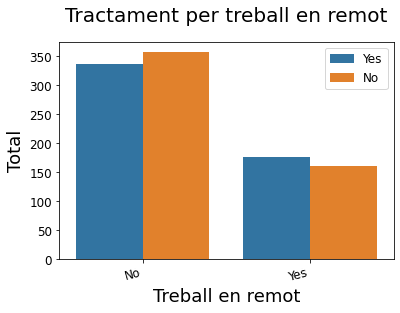

In [80]:
plt.figure(figsize = (12,12))
fig, ax1 = plt.subplots(1, 1)
plt.subplots_adjust(wspace = 0)

# per treball remot
sns.countplot(x = df_tecnologica['remote_work'], hue = df_tecnologica['treatment'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Tractament per treball en remot', pad = 20, fontsize = 20)
ax1.set_xlabel('Treball en remot', fontsize = 18)
ax1.set_ylabel('Total', fontsize = 18)
ax1.legend()

Text(0.5, 1.0, 'Anonimitat protegida')

<Figure size 1152x360 with 0 Axes>

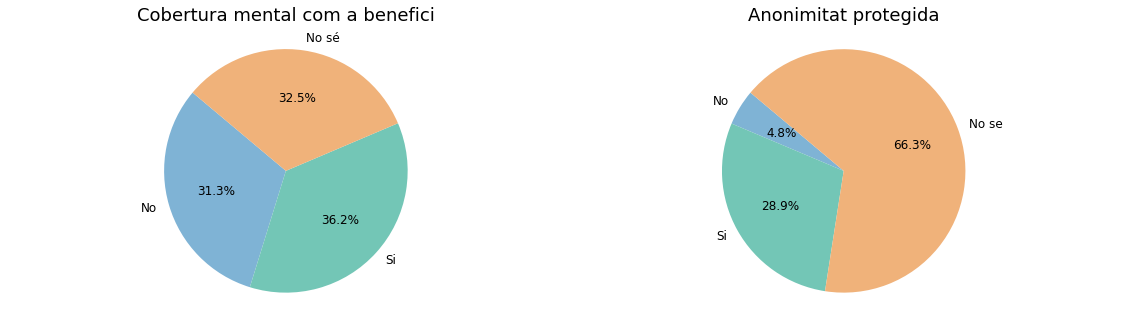

In [85]:
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

# cobertura psicologica com a benefici
all_ = df_tecnologica["benefits"].count()
no_ = df_tecnologica[df_tecnologica["benefits"].str.lower() == 'no']['benefits'].count()
yes_ = df_tecnologica[df_tecnologica["benefits"].str.lower() == 'yes']['benefits'].count()
na_ = df_tecnologica[df_tecnologica["benefits"].str.lower() == "don't know"]['benefits'].count()

labels = 'No', 'Si', 'No sé'
sizes = [no_/all_, yes_/all_, na_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Cobertura mental com a benefici', pad = 14, fontsize = 18)

# esta l'anonimitat protegida a l'hora de demanar ajuda
all_ = df_tecnologica['anonymity'].count()
no_ = df_tecnologica[df_tecnologica['anonymity'].str.lower() == 'no']['anonymity'].count()
yes_ = df_tecnologica[df_tecnologica['anonymity'].str.lower() == 'yes']['anonymity'].count()
na_ = df_tecnologica[df_tecnologica['anonymity'].str.lower() == "don't know"]['anonymity'].count()

labels = 'No', 'Si', 'No se'
sizes = [no_/all_, yes_/all_, na_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Anonimitat protegida', pad = 14, fontsize = 18)

No handles with labels found to put in legend.


<Figure size 864x864 with 0 Axes>

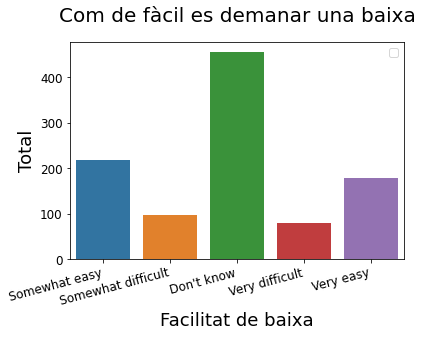

In [91]:
# com de fàcil es demanar una baixa
plt.figure(figsize = (12,12))
fig, ax1 = plt.subplots(1, 1)
plt.subplots_adjust(wspace = 0)

# per treball remot
sns.countplot(x = df_tecnologica['leave'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Com de fàcil es demanar una baixa', pad = 20, fontsize = 20)
ax1.set_xlabel('Facilitat de baixa', fontsize = 18)
ax1.set_ylabel('Total', fontsize = 18)
ax1.legend()

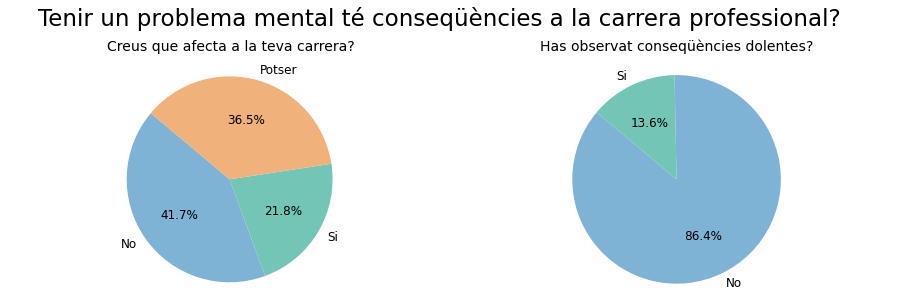

In [95]:
# consequencies negatives a la carrera
fig, (ax1, ax2) = plt.subplots(figsize = (16, 4), ncols=2, nrows=1)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.3)
plt.suptitle('Tenir un problema mental té conseqüències a la carrera professional?', fontsize = 23, y = 1.1)

all_ = df_tecnologica['mental_health_consequence'].count()
no_ = df_tecnologica[df_tecnologica["mental_health_consequence"].str.lower() == 
                     "no"]['mental_health_consequence'].count()
yes_ = df_tecnologica[df_tecnologica["mental_health_consequence"].str.lower() == 
                      "yes"]['mental_health_consequence'].count()
maybe_ = df_tecnologica[df_tecnologica["mental_health_consequence"].str.lower() == 
                        "maybe"]['mental_health_consequence'].count()

labels = 'No', 'Si', 'Potser'
sizes = [no_/all_, yes_/all_, maybe_/all_]
colors = ['#7FB3D5', '#73C6B6', '#F0B27A']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Creus que afecta a la teva carrera?', pad = 14, fontsize = 14)

# has observat consequencies per problemes mentals?
all_ = df_tecnologica['mental_health_consequence'].count()
no_ = df_tecnologica[df_tecnologica["obs_consequence"].str.lower() == "no"]['obs_consequence'].count()
yes_ = df_tecnologica[df_tecnologica["obs_consequence"].str.lower() == "yes"]['obs_consequence'].count()

labels = 'No', 'Si'
sizes = [no_/all_, yes_/all_]
colors = ['#7FB3D5', '#73C6B6']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Has observat conseqüències dolentes?', pad = 14, fontsize = 14);
